### CS4423 - Networks
Prof. Götz Pfeiffer<br />
School of Mathematics, Statistics and Applied Mathematics<br />
NUI Galway

#### 3. Random Networks

# Lecture 11: Erdös-Rényi Random Graph Models.

A [random graph](https://en.wikipedia.org/wiki/Random_graph) is a mathematical model of a family of networks, where certain parameters (like the number of nodes and edges) have fixed values, but other aspects (like the actual edges) are randomly assigned. The simplest example of a random graph is in fact the network $G(n,m)$ with fixed numbers $n$ of nodes and $m$ of edges, placed randomly between the vertices. Although a random graph is not a specific object, many of its properties can be described precisely, in the form of expected values, or probability distributions.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Erdos_generated_network-p0.01.jpg/1280px-Erdos_generated_network-p0.01.jpg">

In [1]:
import networkx as nx
import random
opts = { "with_labels": True, "node_color": 'y'}

## Random Samples

In order to randomly select edges on a given vertex set $X$, we need a procedure
for selecting $m$ from $n$ things randomly, in such a way that each of the $\binom{n}{m}$
subsets of the $n$ things is an equally likely outcome.
We first discuss sampling $m$ values in the range $\{0, 1, \dots, n{-}1\}$.

The most obvious approach is to select each number in the range with probability $p = m/n$.
`python`'s basic random number generator
`random.random` returns a random number in the (half-open) interval $[0, 1)$,
every time it is called.  
Looping with `a` over `range(n)`, if this random number is less then $p$, we include the current
value of `a`, if not we don't.

In [2]:
def random_sample_B(n, p):
    "sample elements in range(n) with probability p"
    sample = []
    for a in range(n):
        if random.random() < p:
            sample.append(a)
    return sample

Let's see a small example:

In [3]:
n = 100
m = 10

In [4]:
pick = random_sample_B(n, m/n)
pick

[13, 21, 25, 29, 39, 52, 54, 56, 63, 65, 72, 89, 91, 92]

In [5]:
len(pick)

14

Unfortunately, this gives a sample of size $m$ only on average.

In [6]:
c = 10000
sum(len(random_sample_B(n, m/n)) for i in range(c))/c

9.9859

* Let $k$ be the sample size, as a random variable.

* **Expected value:** $E[k] = np = m$.

**Proof:** This is a [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution).

* The probability of a specific subset of size $k$ to be chosen is $p^k (1-p)^{n-k}$.

* As there are $\binom{n}{k}$ subsets of size $k$, the probabilty $P(k)$
  of the sample to have size $k$ is $P(k) = \binom{n}{k} p^k (1-p)^{n-k}$.
  
* Thus $E[k] = \sum_{k=0}^n P(k) \cdot k
= \sum_{k=0}^n k \binom{n}{k} p^k (1-p)^{n-k}
= np\sum_{l=0}^{n-1} \binom{n-1}{l} p^l (1-p)^{(n-1)-l}
= np
$,

* as $k \binom{n}{k} p^k = np \binom{n-1}{k-1} p^{k-1}$ and $(1-p)^{n-k} = (1-p)^{(n-1)-(k-1)}$.

* **Standard deviation**: $\sigma_k = \sqrt{m(1 - m/n)}$.

* $E[k^2] = \sum_{k=0}^n P(k) \cdot k^2 = \cdots = n(n-1)p^2 + np$.

* $E[k^2] - E[k]^2 = n(n-1)p^2 + np - (np)^2 = np(1-p)$.

In [7]:
c = 10000
sum(1 for i in range(c) if len(random_sample_B(n, m/n)) == m)

1339

A simple modification of this procedure will always yield samples of size $m$:

* number $a$ should be selected with probability $(m-c)/(n-a)$,
if $c$ items have already been selected.

In [8]:
def random_sample_A(n, m):
    sample = []
    for a in range(n):
        if (n - a) * random.random() < m - len(sample):
            sample.append(a)
    return sample

Let's see a small example.

In [9]:
pick = random_sample_A(n, m)
pick

[22, 23, 26, 37, 44, 45, 53, 76, 78, 85]

In [10]:
len(pick)

10

## Uniformly Selected Edges

Let us denote by $G(n, m)$ a network with $n$ nodes and $m$ chosen
edges, chosen uniformly at random (out of the possible
$\binom{n}{2}$).  Equivalently, one can choose uniformly at random
one network in the **set** $G(n, m)$ of **all** networks on a given set
of $n$ nodes with **exactly** $m$ edges.

<div class="alert alert-danger">

**Definition (ER Model $A$: Uniform Random Graphs).**
Let $n \geq 1$, let $N = \binom{n}{2}$ and let $0 \leq m \leq N$.

The model $G(n, m)$ consists of the ensemble of graphs $G$
with $n$ nodes $X = \{0, 1, \dots, n{-}1\}$, and $m$ randomly selected
edges, chosen uniformly from the $N$ possible edges.

</div>

One could think of $G(n, m)$ as a probability distribution
$P \colon G(n, m) \to \mathbb{R}$,
that assigns to each network $G \in G(n, m)$ the same probability
$$
P(G) = \binom{N}{m}^{-1},
$$
where $N = \binom{n}{2}$.

For example ...

<img src="images/random-gnm.png">

A function `random_graph_A` that
takes the order $n$ and the size $m$ of a random ER graph of type A
as arguments, and constructs such a graph can simply follow the 
`random_sample_A` algorithm and sample exactly $m$ of the $N = \binom{n}{2}$
available edges.  We introduce explicit counters
`a` (for the number of edges that have been considered)
and `c` (for the number of chosen edges).

In [11]:
def random_graph_A(n, m):
    """construct a random type A graph
    with n nodes and m links"""
    a = c = 0
    N = n * (n-1) // 2
    G = nx.empty_graph(n)
    for x in range(n):
        for y in range(x):
            if (N - a) * random.random() < m - c:
                G.add_edge(x, y)
                c += 1
            a += 1
    return G

Now we can construct and draw a random graph on $16$ vertices with $15$ edges.

In [12]:
n = 16
m = 15

In [13]:
G = random_graph_A(n, m)
nx.draw(G, **opts)

The `networkx` version of this random graph constructor is called `gnm_random_graph`
and should produce the same random graphs with the same probability. 

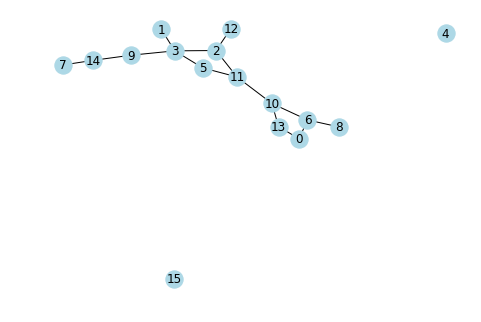

In [14]:
opts1 = { "with_labels": True, "node_color": 'lightblue'}
G = nx.gnm_random_graph(n, m)
nx.draw(G, **opts1)

In [15]:
list(G.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

## An Animated Random Graph

Adding one randomly selected edge at a time ... until the [graph](http://schmidt.nuigalway.ie/cs4423/random.html) is connected.

## Randomly Selected Edges

<div class="alert alert-danger">

**Definition (ER Model $B$: Binomial Random Graphs).**
Let $n \geq 1$, let $N = \binom{n}{2}$ and let $0 \leq p \leq 1$.


The model $G(n, p)$ consists of the ensemble of graphs $G$
with $n$ nodes $X = \{0, 1, \dots, n{-}1\}$, and each of the $N$
possible edges chosen with probability $p$.
</div>

The probability $P_G$ of a particular graph $G = (X, E)$ with 
$X = \{0, 1, \dots, n{-}1\}$ and
$m = |E|$ edges in the $G(n, p)$ model is
$$
P_G = p^m(1-p)^{N-m}.
$$

For example ...

<img src="images/random-gnp.png">

Such a random graph is easy to generate programmatically, 
following the `random_sample_B` algorithm.
`python`'s basic random number generator
`random.random` returns a random number in the (half-open) interval $[0, 1)$,
every time it is called.  If this number is less then $p$, we include the edge, if not we don't.

In [16]:
def random_graph_B(n, p):
    """construct a random type B graph
    with n nodes and edge probability p"""
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for a in range(n):
        for b in range(a):
            if random.random() < p:
                G.add_edge(a, b)
    return G

In [17]:
n = 16
m = 15
N = n*(n-1)//2
m/N

0.125

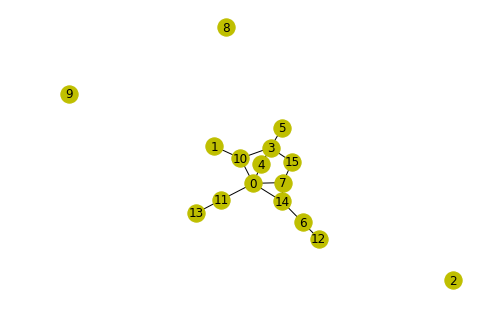

In [18]:
G = random_graph_B(n, m/N)
nx.draw(G, **opts)

In [19]:
G.number_of_nodes(), G.number_of_edges()

(16, 15)

The `networkx` version of this random graph constructor is called `gnp_random_graph`
and should produce the same random graphs with the same probability. 

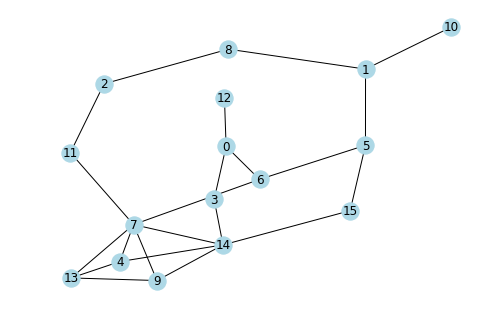

In [20]:
G = nx.gnp_random_graph(n, m/N)
nx.draw(G, **opts1)

In [21]:
G.number_of_nodes(), G.number_of_edges()

(16, 22)

##  Code Corner

### `random`

* `random`: [[doc]](https://docs.python.org/2/library/random.html#random.random)


* `sample`: [[doc]](https://docs.python.org/2/library/random.html#random.sample)

### `numpy`

* `random.choice`: [[doc]](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html)

### `networkx`

* `gnm_random_graph`: [[doc]](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnm_random_graph.html)


* `gnp_random_graph`: [[doc]](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.gnp_random_graph.html)

##  Exercises

1.  What is the expected number $E[m]$ of edges in the $G(n, p)$ model of random graphs?

2.  What is the standard deviation $\sigma_m$ of the number of edges in the
$G(n, p)$ model?